In [ ]:
# Importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.8.0


In [ ]:
# Mounting the drive to get the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
x_test = pd.read_csv(r"/content/drive/MyDrive/ECE657A/x_test.csv")
x_train = pd.read_csv(r"/content/drive/MyDrive/ECE657A/x_train.csv")
y_test = pd.read_csv(r"/content/drive/MyDrive/ECE657A/y_test.csv")
y_train = pd.read_csv(r"/content/drive/MyDrive/ECE657A/y_train.csv")

In [ ]:
# Importing seaborn for better plots
import seaborn as sns

In [ ]:
# Preprocessing the data

def data_preprocessing(raw):

    num_images = raw.shape[0]
    x_as_array = raw.values[:,:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x

In [ ]:
# prepare the data
X_train = data_preprocessing(x_train)
X_test = data_preprocessing(x_test)

In [ ]:
# prepare the labels
Y_train = tf.keras.utils.to_categorical(y_train, 5)
Y_test = tf.keras.utils.to_categorical(y_test, 5)

In [ ]:
# create the train and the validation set from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

In [ ]:
# Creating the network architecture for our CNN model
cm4 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# Compiling the model
cm4.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
train_model_2 = cm4.fit(X_train, Y_train,epochs=10, validation_data=(X_val, Y_val) )

Epoch 1/10
1500/1500 [==============================] - 27s 9ms/step - loss: 0.4260 - accuracy: 0.8485 - val_loss: 0.2700 - val_accuracy: 0.8988
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2599 - accuracy: 0.9094 - val_loss: 0.1882 - val_accuracy: 0.9316
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2151 - accuracy: 0.9252 - val_loss: 0.1773 - val_accuracy: 0.9383
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1838 - accuracy: 0.9365 - val_loss: 0.1659 - val_accuracy: 0.9415
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1600 - accuracy: 0.9451 - val_loss: 0.1609 - val_accuracy: 0.9440
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1376 - accuracy: 0.9532 - val_loss: 0.1507 - val_accuracy: 0.9488
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1185 - accuracy: 0.9597 - val_loss: 0.1601 - val_ac

In [ ]:
# Embedding
# Use the output of the final Dense layer as the encoding 
# It is a 5-dimensional vector
enc_model = tf.keras.Model(cm4.layers[0].input, cm4.layers[11].output)

In [ ]:
enc_model

In [ ]:
# get an encoding on a sample data
X_encoding = enc_model(X_test)
X_encoding.shape

TensorShape([10000, 128])

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_encoding)
pca.explained_variance_

array([1038373.44652457,  633956.42762392])

In [ ]:
X_pca = pca.transform(X_encoding)

In [ ]:
X_test.shape,   X_pca.shape, Y_test.shape

((10000, 28, 28, 1), (10000, 2), (10000, 5))

In [ ]:
dum_y_test = np.argmax(Y_test, axis=1)

In [ ]:
dum_y_test

array([4, 2, 2, ..., 3, 2, 1])

[]

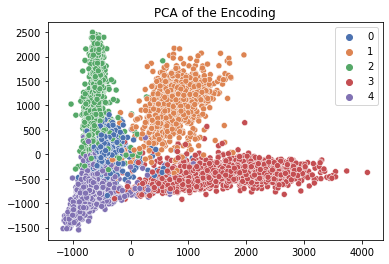

In [ ]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dum_y_test.flatten(), palette="deep")
plt.title('PCA of the Encoding')
plt.plot()

In [ ]:
# Let's plot the average of images 
# X_enc_img = X_encoding.reshape([-1, 14, 14])
x_test_subset = X_test
y_test_subset = dum_y_test.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))


print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


In [ ]:
x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

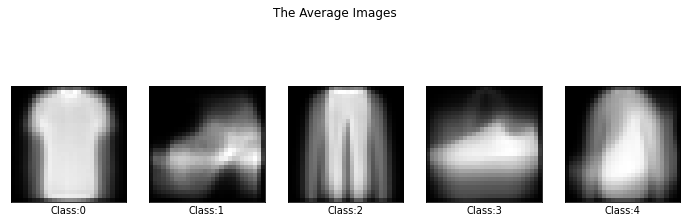

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images')
plt.show()

In [ ]:
# KMEANS

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(X_encoding)
kmeans.labels_.shape

(10000,)

[]

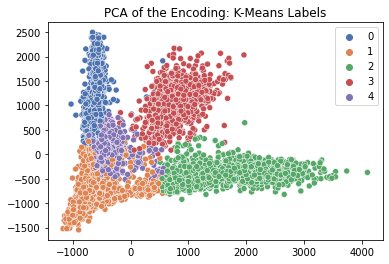

In [ ]:
# Use the k-means labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="deep")
plt.title('PCA of the Encoding: K-Means Labels')
plt.plot()

In [ ]:



from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=500, min_samples=10).fit(X_encoding)
np.unique(clustering.labels_, return_counts=True) 

(array([-1,  0,  1,  2,  3]), array([ 687, 2824, 5804,  677,    8]))

[]

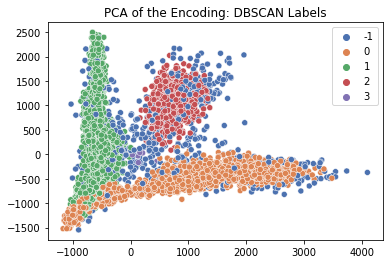

In [ ]:
# Use the DBSCAN labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clustering.labels_, palette="deep")
plt.title('PCA of the Encoding: DBSCAN Labels')
plt.plot()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# T-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_encoding)
X_embedded.shape

(10000, 2)

[]

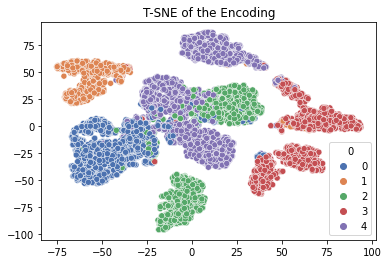

In [ ]:
# T-SNE visualization
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_test['0'], palette="deep")
plt.title('T-SNE of the Encoding')
plt.plot()